
# <span style="color:orange">12/05 - Pair Programming Limpieza 8 - Lidia y Tatiana</span>

In [1]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from scipy import stats # para hacer la transformación box-cox

pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv("./limpieza_7.csv", index_col = 0)
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada,NORM_boxcox,NORM_scaller
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834,9.116327,0.651163
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946,2.397895,3.316625,3.804860,0.116279


# Ejercicio 1
Estandarizar la columna de age usando todos los métodos aprendidos en la lección.

In [3]:
media = df["age"].mean()
desviacion = df["age"].std() 
df["EST_manual"] = (df["age"] - media) / desviacion
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada,NORM_boxcox,NORM_scaller,EST_manual
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834,9.116327,0.651163,2.879330
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946,2.397895,3.316625,3.804860,0.116279,-1.559821


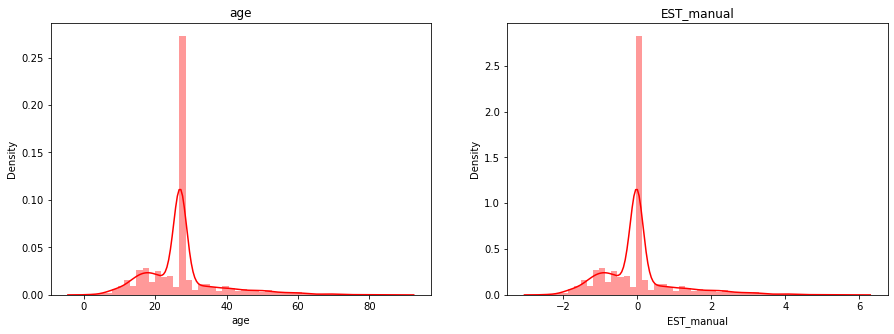

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title("EST_manual")

sns.distplot(df['age'] ,ax = axes[0],color="r")
sns.distplot(df['EST_manual'], ax = axes[1],color="r");


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# iniciamos el método para escalar
scaler = StandardScaler()

In [7]:
df[["EST_scaller"]] = scaler.fit_transform(df[["age"]])


In [8]:
df.head(1)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada,NORM_boxcox,NORM_scaller,EST_manual,EST_scaller
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834,9.116327,0.651163,2.87933,2.879561


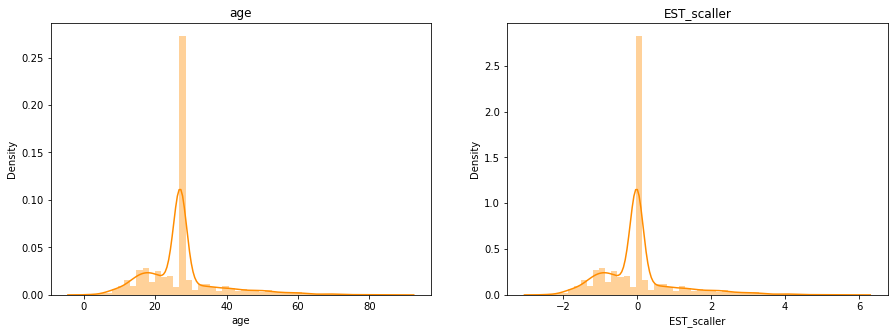

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title('EST_scaller')

sns.distplot(df['age'] ,ax = axes[0],color="darkorange")
sns.distplot(df['EST_scaller'], ax = axes[1],color="darkorange");


In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
# construir el modelo de escalador
robust = RobustScaler()

In [12]:
df[["EST_robust"]] = robust.fit_transform(df[["age"]])

In [13]:
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada,NORM_boxcox,NORM_scaller,EST_manual,EST_scaller,EST_robust
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834,9.116327,0.651163,2.879330,2.879561,6.0
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946,2.397895,3.316625,3.804860,0.116279,-1.559821,-1.559946,-3.2


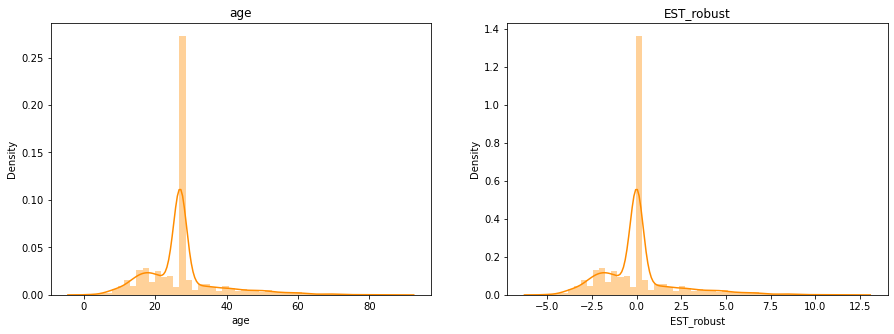

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title('EST_robust')

sns.distplot(df['age'] ,ax = axes[0],color="darkorange")
sns.distplot(df['EST_robust'], ax = axes[1],color="darkorange");


# Ejercicio 2
¿Véis alguna diferencia entre cada uno de los métodos?

StandarScaller estandariza con la media y la desviación típica - lo usamos si tenemos outliers


RobustScaller estandariza con la mediana y el rango intercuartilico - lo usamos si no tenemos outliers
Este metodo elimina la mediana y escala los datos entre el primer y tercer cuartil

# Ejercicio 3 
Cread una gráfica con varios subplots donde en cada uno de ellos se vea el resultado de la estandarización y la normalización realizada en los dos ejercicios de pair programming de hoy.

In [14]:
columnas= "age","EST_manual", "EST_scaller", "EST_robust"

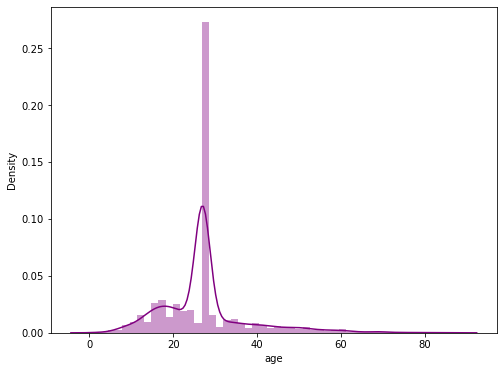

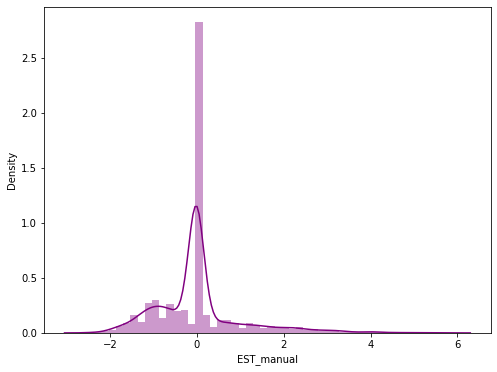

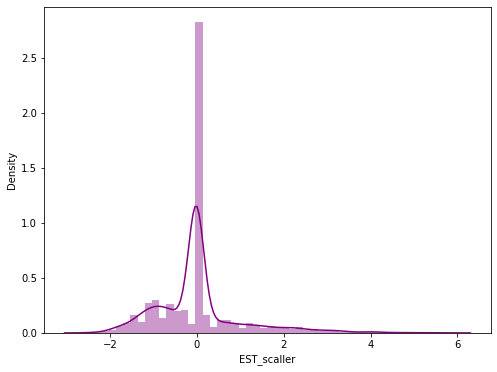

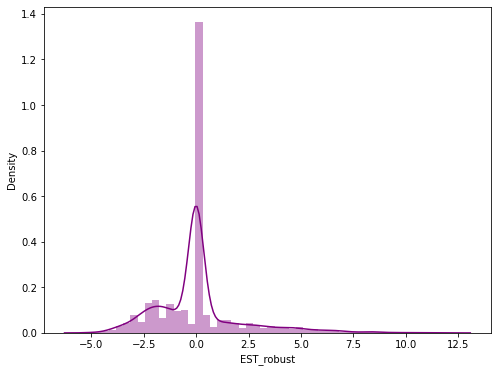

In [15]:
for i in columnas:
    plt.figure(figsize = (8, 6))
    sns.distplot(df[i],color='purple') #lista de todas las columnas normalizadas
    plt.show()
